### Text mining for twitter malls data

#### Import data from csv file

In [149]:
import pandas as pd

df1 = pd.read_csv('data/Mall/dubaimall.csv')
df2 = pd.read_csv('data/Mall/marinamall.csv')
df3 = pd.read_csv('data/Mall/ibnbattutamall.csv')
df4 = pd.read_csv('data/Mall/festivalcitymall.csv')

In [150]:
DFL=[df1,df2,df3,df4]

In [151]:
DFL[0].head(3)

,Unnamed: 0,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL
0,0,Enoch Mthembu,@EnochMthembu,2020-12-01T17:11:44.000Z,Enjoying coffee in Dubai Mall.,NaN,NaN,1.0,NaN,1,['https://pbs.twimg.com/media/EoKvN7CXYAECo0m?...,https://twitter.com/EnochMthembu/status/133382...
1,1,Bernard Sabi Mulenga,@sabi_jnr,2020-12-01T17:49:15.000Z,Great time ate the Dubai mall.,NaN,NaN,NaN,NaN,NaN,['https://pbs.twimg.com/media/EoK3yw3WMAEtan3?...,https://twitter.com/sabi_jnr/status/1333830532...
2,2,Olatunji\nChelsea.,@27_olatunji,2020-12-01T16:43:36.000Z,Spirit of the Union \n 49th National Day Celeb...,NaN,💦 💙 💫 💙,NaN,1,5,['https://pbs.twimg.com/media/EoKoq4QXEAUn0rD?...,https://twitter.com/27_olatunji/status/1333814...


In [152]:
print("Dataset summary is\n")
print("Dubai Mall data has", len(df1),"rows")
print("Marina Mall data has", len(df2),"rows")
print("IbnBattuta Mall data has", len(df3),"rows")
print("Festival City Mall data has", len(df4),"rows")

Dataset summary is

Dubai Mall data has 2327 rows
Marina Mall data has 96 rows
IbnBattuta Mall data has 50 rows
Festival City Mall data has 92 rows


In [153]:
df1.columns

Index(['Unnamed: 0', 'UserScreenName', 'UserName', 'Timestamp', 'Text',
       'Embedded_text', 'Emojis', 'Comments', 'Likes', 'Retweets',
       'Image link', 'Tweet URL'],
      dtype='object')

<AxesSubplot:ylabel='UserScreenName'>

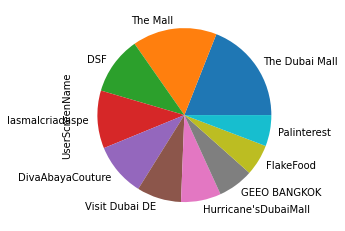

In [154]:
DFL[0].UserScreenName.value_counts()[:10].plot(kind='pie')

<AxesSubplot:>

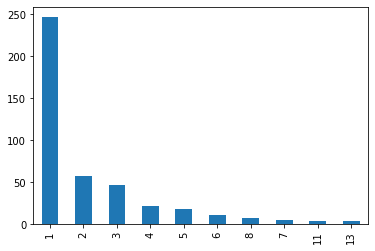

In [155]:
DFL[0].Likes.value_counts().head(10).plot(kind='bar')

# Exploratory Data Analysis

Step 1: Drop unwanted columns

In [156]:
# 'Unnamed: 0' is not needed, will drop it
for k in range(4):
    DFL[k].drop(columns=['Unnamed: 0'], inplace=True)
    # after filtering have resetting the index of the dataframe
    DFL[k].reset_index(drop=True, inplace=True)

In [157]:
DFL[0].columns

Index(['UserScreenName', 'UserName', 'Timestamp', 'Text', 'Embedded_text',
       'Emojis', 'Comments', 'Likes', 'Retweets', 'Image link', 'Tweet URL'],
      dtype='object')

In [10]:
#Step 0:UserName similar to keyword, but not related to the malls
# this user seems to have an ID similar to mall's name (one of the used keyword) - this data is not relevat
#df2[df2['UserScreenName']=='Daniela.']
# automatic way of filtering out these cases?
# filter users' data that is not relevant
#df2 = df2[df2['UserScreenName']!='Daniela.']
# dataset size after filtering
#len(df2)
# after every filtering have to reset index of the dataframe
#df2.reset_index(drop=True, inplace=True)

Step 2: Removing Tweets with NA in Text

In [158]:
# Check for NA text values
for k in range(len(DFL)):
    print(DFL[k][DFL[k].Text.isna()])

                                         UserScreenName UserName  \
2279  Emmanuel COLBRANT | CHRETIEN - CHRISTEN - MUSU...      NaN   

                     Timestamp Text  \
2279  2021-03-28T08:27:28.000Z  NaN   

                                          Embedded_text Emojis  Comments  \
2279  Dubai Mall | Friday Weekend Walk | The Busiest...    NaN       NaN   

     Likes Retweets                                         Image link  \
2279     1        1  ['https://pbs.twimg.com/card_img/1376088533849...   

                                              Tweet URL  
2279  https://twitter.com/EColbrant/status/137608853...  
Empty DataFrame
Columns: [UserScreenName, UserName, Timestamp, Text, Embedded_text, Emojis, Comments, Likes, Retweets, Image link, Tweet URL]
Index: []
Empty DataFrame
Columns: [UserScreenName, UserName, Timestamp, Text, Embedded_text, Emojis, Comments, Likes, Retweets, Image link, Tweet URL]
Index: []
Empty DataFrame
Columns: [UserScreenName, UserName, Timestamp,

In [159]:
DFL[0][DFL[0].Text.isna()]

,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL
2279,Emmanuel COLBRANT | CHRETIEN - CHRISTEN - MUSU...,NaN,2021-03-28T08:27:28.000Z,NaN,Dubai Mall | Friday Weekend Walk | The Busiest...,NaN,NaN,1,1,['https://pbs.twimg.com/card_img/1376088533849...,https://twitter.com/EColbrant/status/137608853...


In [160]:
#dropping the null tweet
for k in range(4):    
    DFL[k].dropna(axis='rows',subset=['Text'],inplace=True)
    # after filtering resetting the index of the dataframe
    DFL[k].reset_index(drop=True,inplace=True)

Step 3: Processing Text for Tokenization by
- Removing Numbers
- Removing Punctuations
- Converting to lowercase
- Substitute multiple whitespace with single whitespace
- Removing leading and trailing whitespaces


In [161]:
import re
import string

In [163]:
#Processing text for tokenization
def clean_text(text):    
    text_nonum = re.sub(r'\d+', '', text)
    text_nopunct = "".join([char.lower() for char in text_nonum if char not in string.punctuation]) 
    text_no_doublespace = re.sub('\s+', ' ', text_nopunct).strip()
    return text_no_doublespace

#cleaner=[]

for j in range(len(DFL)):
    cleaner = []
    for i in range(len(DFL[j])):
        
        #first loop j = 1 
        cleaner.append(clean_text(DFL[j]['Text'][i]))
    #    itrating withj=1 nd i = 0 till 2326
    DFL[j]['cleaned_tweet']=cleaner

In [164]:
DFL[0].columns

Index(['UserScreenName', 'UserName', 'Timestamp', 'Text', 'Embedded_text',
       'Emojis', 'Comments', 'Likes', 'Retweets', 'Image link', 'Tweet URL',
       'cleaned_tweet'],
      dtype='object')

In [166]:
DFL[0][['Text','cleaned_tweet']].head()

,Text,cleaned_tweet
0,Enjoying coffee in Dubai Mall.,enjoying coffee in dubai mall
1,Great time ate the Dubai mall.,great time ate the dubai mall
2,Spirit of the Union \n 49th National Day Celeb...,spirit of the union th national day celebratio...
3,A7b kaif they are playing 3y’9a f dubai mall,ab kaif they are playing y’a f dubai mall
4,Just posted a photo @ Dubai Mall Dubai-UAE ht...,just posted a photo dubai mall dubaiuae httpsi...


In [19]:
# replace punctuations in twitter message and add results to new column
import string
cleans = []
for i in range(len(df2)):
    clean = re.sub(r"""
                   [,.:;@#*?!&$\\*/*'"’]+  # accept one or more copies of punctuation
                   \ *           # plus zero or more copies of a space,
                   """,
                   " ",          # and replace it with a single space
                   df2['Text'].apply(str)[i], flags=re.VERBOSE)
    cleans.append(clean)
    
df2['Text_noPunct'] = cleans

In [20]:
df1[['Text', 'Text_noPunct']].head()

KeyError: "['Text_noPunct'] not in index"

Step 5: Removing tweets that are not in English

In [167]:
# install needed package - Language detection library ported from Google's language-detection
! pip install langdetect

In [168]:
from langdetect import detect

In [169]:
# add new column in dataframe with language detected
for k in range(4):
    DFL[k]['text_language'] = [detect(this_text) for this_text in DFL[k].cleaned_tweet]

In [170]:
DFL[0][['Text', 'cleaned_tweet', 'text_language']].head()

,Text,cleaned_tweet,text_language
0,Enjoying coffee in Dubai Mall.,enjoying coffee in dubai mall,en
1,Great time ate the Dubai mall.,great time ate the dubai mall,en
2,Spirit of the Union \n 49th National Day Celeb...,spirit of the union th national day celebratio...,en
3,A7b kaif they are playing 3y’9a f dubai mall,ab kaif they are playing y’a f dubai mall,en
4,Just posted a photo @ Dubai Mall Dubai-UAE ht...,just posted a photo dubai mall dubaiuae httpsi...,en


In [171]:
# keeping only twitter messages that are in English 
for k in range(4):
    DFL[k] = DFL[k][DFL[k]['text_language']=='en']

In [172]:
# after filtering have resetting the index of the dataframe
for k in range(4):
    DFL[k].reset_index(drop=True, inplace=True)

In [173]:
# size of the dataset after filtering
for k in range(4):
    print(len(DFL[k]))

1464
63
36
82


In [174]:
DFL[0].columns

Index(['UserScreenName', 'UserName', 'Timestamp', 'Text', 'Embedded_text',
       'Emojis', 'Comments', 'Likes', 'Retweets', 'Image link', 'Tweet URL',
       'cleaned_tweet', 'text_language'],
      dtype='object')

In [175]:
DFL[0].head(2)

,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL,cleaned_tweet,text_language
0,Enoch Mthembu,@EnochMthembu,2020-12-01T17:11:44.000Z,Enjoying coffee in Dubai Mall.,NaN,NaN,1.0,NaN,1,['https://pbs.twimg.com/media/EoKvN7CXYAECo0m?...,https://twitter.com/EnochMthembu/status/133382...,enjoying coffee in dubai mall,en
1,Bernard Sabi Mulenga,@sabi_jnr,2020-12-01T17:49:15.000Z,Great time ate the Dubai mall.,NaN,NaN,NaN,NaN,NaN,['https://pbs.twimg.com/media/EoK3yw3WMAEtan3?...,https://twitter.com/sabi_jnr/status/1333830532...,great time ate the dubai mall,en


Step 6: Tokenization of processed twitter messages

In [176]:
! pip install nltk

In [177]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     /home/datascience/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [178]:
# add new column in dataframe with list of tokens in each twitter message
for k in range(4):
    DFL[k]['Text_tokens'] = [word_tokenize(this_text) for this_text in DFL[k].cleaned_tweet]

/home/datascience/conda/classic_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [179]:
# display results
DFL[0].Text_tokens[2]

['spirit',
 'of',
 'the',
 'union',
 'th',
 'national',
 'day',
 'celebration',
 'mood',
 'at',
 'mall',
 'of',
 'emirates',
 'dubai',
 'united',
 'arab',
 'emirates']

Step 7: Remove stopwords

In [180]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/datascience/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [181]:
# set stopwords and appending special characters
stop_words = list(set(stopwords.words('english')))
stop_words.append("’")
print(stop_words)

['d', 'can', 'few', 'your', 'not', "wouldn't", 'most', 'yourself', 'at', 'herself', 'when', 'mustn', 'so', "weren't", 'than', "hasn't", 'just', 'whom', 'couldn', "that'll", 'before', "you're", 'with', 'too', 'him', 'doing', 'y', 'aren', 'between', "you'd", 'we', 'yours', 'these', 'nor', 'weren', 'ain', 're', 'by', 'each', 'be', 'what', 'does', 'it', 'didn', 'or', 'under', 'who', "mustn't", 'yourselves', 'off', 'an', "wasn't", "didn't", "couldn't", 'some', 'am', 'hers', 'until', "won't", 'itself', 'their', "haven't", 'they', 'himself', 'o', "aren't", 'once', 'very', 'over', 'of', 'will', 'above', 'against', 'same', "doesn't", 'themselves', 'through', "you've", 'further', 't', 'from', 'both', 'won', "you'll", 'shan', 'in', 'been', 'to', 'wouldn', 'was', 'here', 'ourselves', 'while', 'theirs', 'down', 'should', 'a', 'as', 'he', 'no', 'during', 'other', 'on', 'ma', 'haven', 'again', 'she', 'ours', 'have', "don't", 'wasn', 'only', 'up', 'why', 'this', 'below', 'doesn', 'has', 'but', 'don', 

In [182]:
# remove stopwords from tokens

for j in range(len(DFL)):
    results_tkns = []
    for i in range(len(DFL[j])):
        results_tkns.append([token for token in DFL[j]['Text_tokens'][i] if token not in stop_words])
    
    DFL[j]['Text_tokens_noStopWords'] = results_tkns

/home/datascience/conda/classic_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
#weird error
print(df1['Text_tokens_noStopWords'][0])
print(df1['Text_tokens'][0])

KeyError: 'Text_tokens_noStopWords'

In [183]:
print(DFL[0]['Text_tokens'][0])
print(DFL[0]['Text_tokens_noStopWords'][0])

['enjoying', 'coffee', 'in', 'dubai', 'mall']
['enjoying', 'coffee', 'dubai', 'mall']


In [184]:
#Storing Tokens without stop words grouped by mall into a nested list
matrix = []
  
for i in range(len(DFL)):
      
    # Append an empty sublist inside the list
    matrix.append([])
      
    for j in range(len(DFL[i])):
        matrix[i].append(DFL[i]['Text_tokens_noStopWords'][j])
          
print(matrix[0][0])

['enjoying', 'coffee', 'dubai', 'mall']


In [ ]:
#Stemming can be done but won't be useful for sentiment analysis
#from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
#st = PorterStemmer()

In [595]:
#dimred_matrix = [val for sublist in matrix for val in sublist]
#flat_matrix = [val for sublist in dimred_matrix for val in sublist]

In [31]:
# # Step 7: for more complex dataset, apply lemmatization of tokens
# from nltk.stem import WordNetLemmatizer
# nltk.download('wordnet')

# lemmatizer = WordNetLemmatizer()

# for item in df['Text_tokens_noStopWords'][2]:
#     print(item, ': ', lemmatizer.lemmatize(item)) 

Step 7: Word Frequency of tokens grouped by Malls

In [185]:
from nltk.probability import FreqDist

In [186]:
#combined tokens for all malls
all_tokens = [item for sublist in results_tkns for item in sublist]

In [187]:
#Creating an empty nested list to store freq of words by mall
freqlist=[]
for i in range(len(DFL)):      
    # Append an empty sublist inside the list
    freqlist.append([])

In [188]:
#Storing all tokens based on Malls
for y in range(len(DFL)):
    freqlist[y] = [item for sublist in matrix[y] for item in sublist]

In [189]:
#Creating an empty nested list to store top words by mall
fdist_top=[]
for i in range(len(DFL)):      
     fdist_top.append([])

In [190]:
# find the frequency of top 25 tokens in all twitter messages
for i in range(len(DFL)):
    fdist = FreqDist(freqlist[i])
    fdist_top[i] = fdist.most_common(25)

In [191]:
#Top keywords for dubai mall
fdist_top[0][:5]

[('dubai', 1725),
 ('mall', 1425),
 ('shopping', 151),
 ('uae', 141),
 ('emirates', 127)]

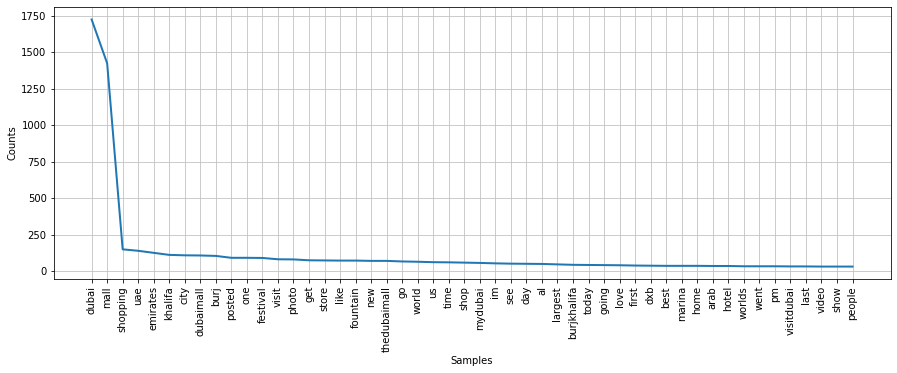

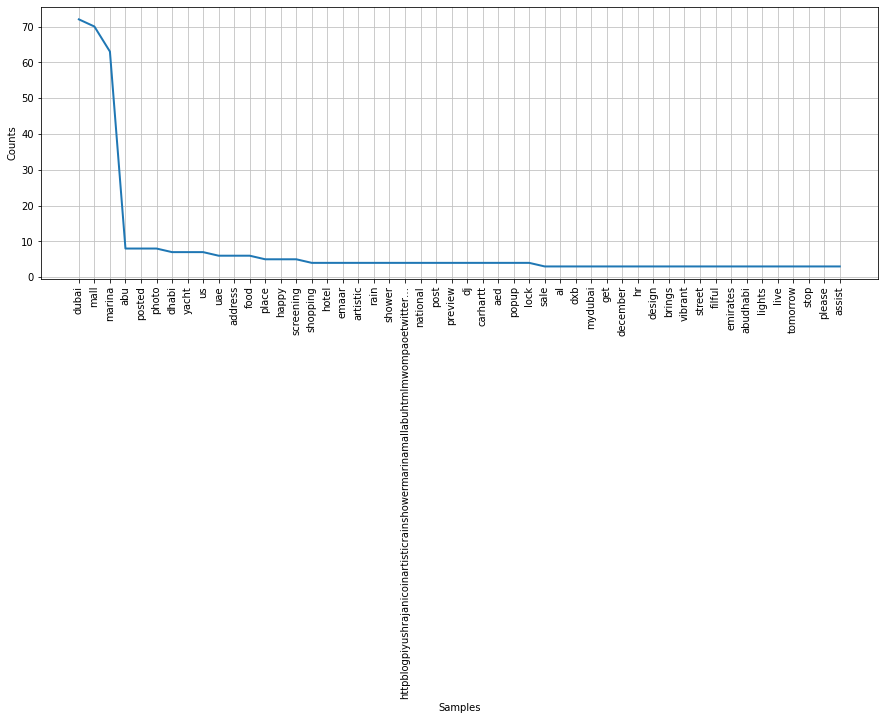

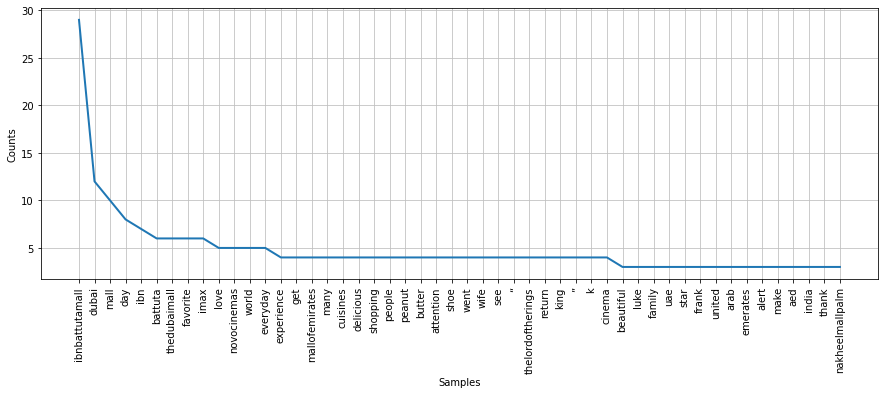

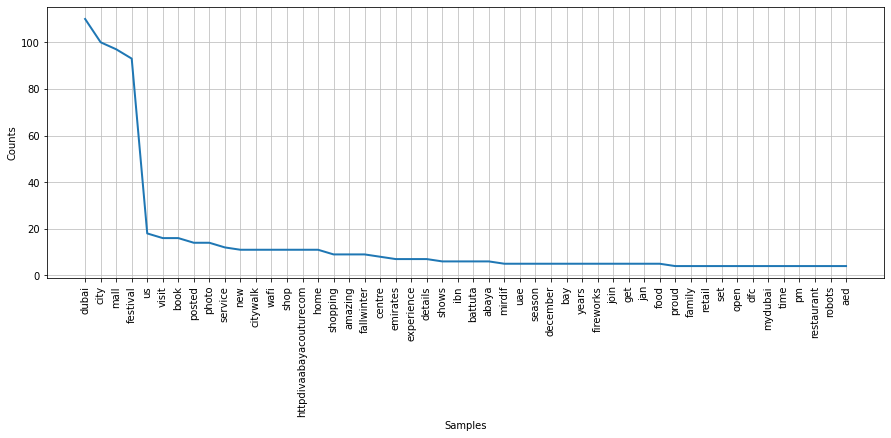

In [192]:
# frequency distribution plot Mall Wise
import matplotlib.pyplot as plt
for i in range(len(DFL)):
    fdist = FreqDist(freqlist[i])
    plt.subplots(figsize=(15, 5))
    fdist.plot(50, cumulative=False)
    plt.show()

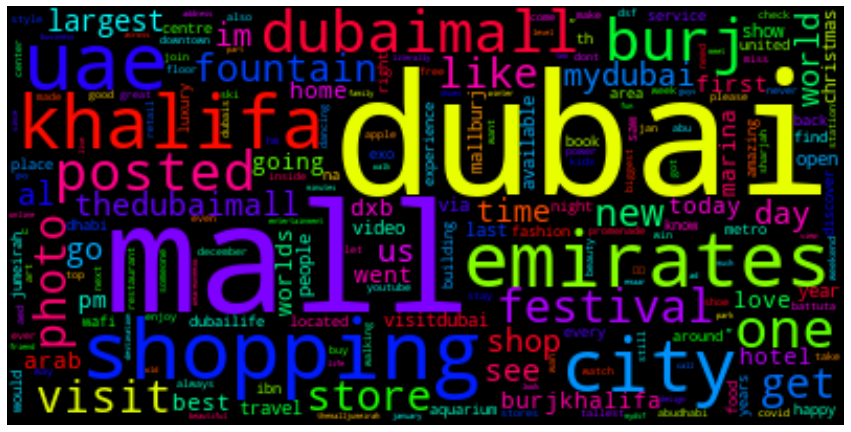

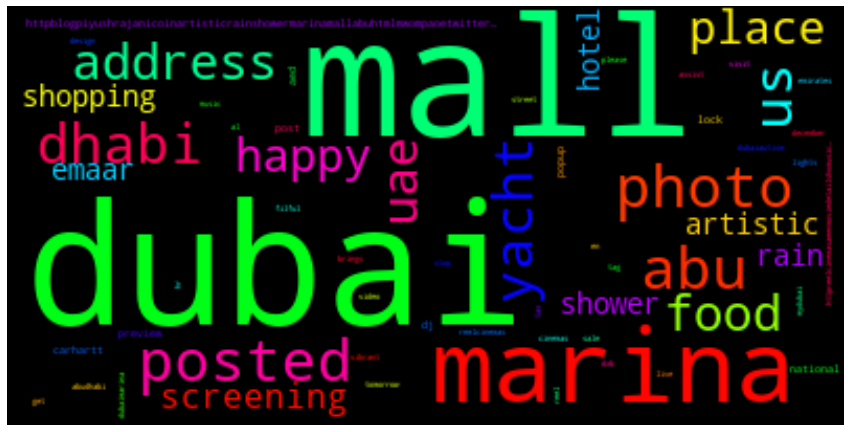

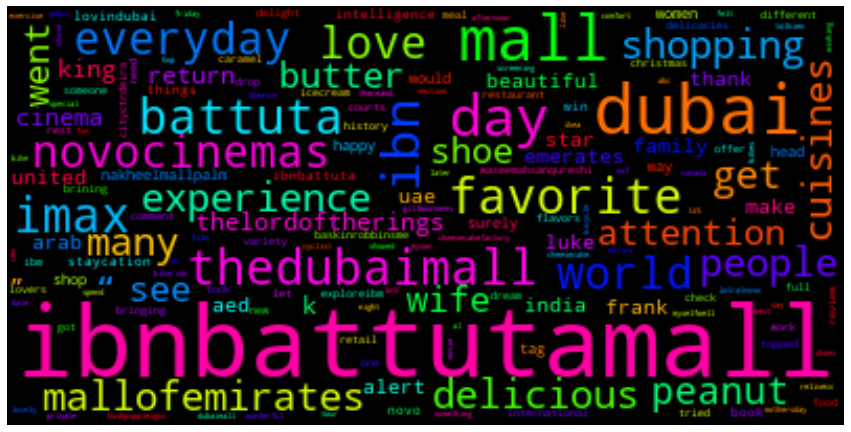

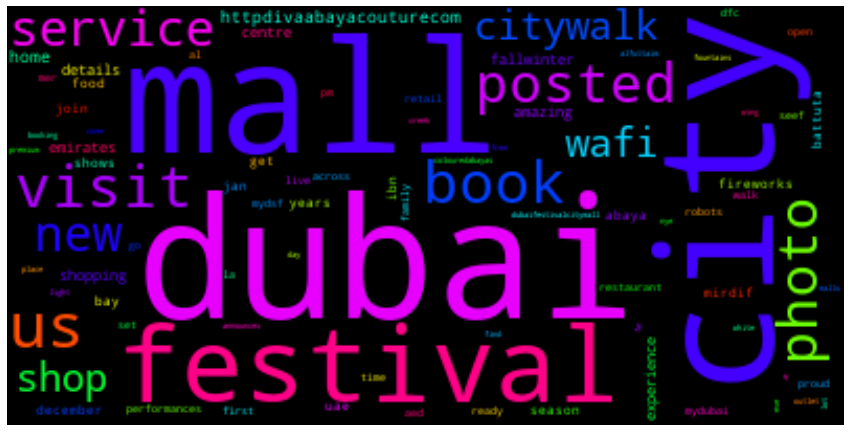

In [193]:
# word cloud mall wise
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
for i in range(len(DFL)):
    dictionary=Counter(freqlist[i])
    cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(dictionary)
    plt.figure(figsize=(15,18))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

(-0.5, 899.5, 1097.5, -0.5)

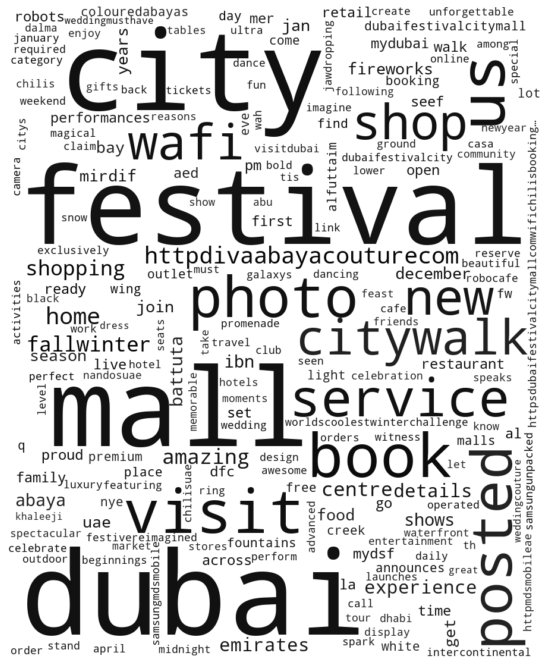

In [194]:
#combined wordcloud
from PIL import Image
import numpy as np
med_mask = np.array(Image.open("data/bag.png"))

# Custom Colormap
from matplotlib.colors import LinearSegmentedColormap
colors = ["#000000", "#111111", "#101010", "#121212", "#212121", "#222222"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

wc = WordCloud(background_color="white", mask=med_mask, colormap=cmap)
wc.generate_from_frequencies(dictionary)
plt.figure(figsize=(16,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

#### Timespan of twitter messages and trends

In [195]:
import datetime
import matplotlib.pyplot as plt

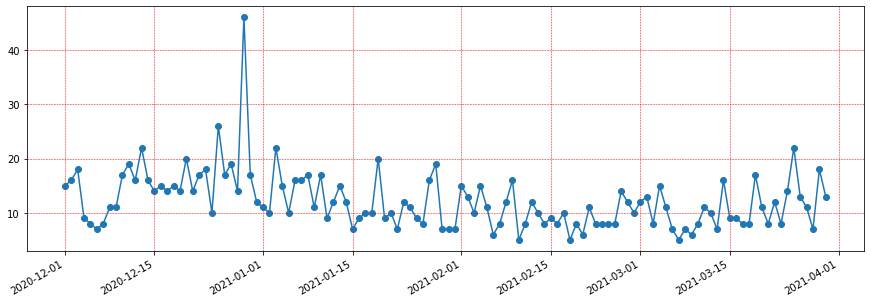

In [196]:
# define vectors to be plotted according to "corresponding day"-level
from collections import Counter
from collections import OrderedDict

#mall selection
m=0
# truncate timestamps to daily values
x = [datetime.datetime.strptime(elem, '%Y-%m-%dT%H:%M:%S.%fZ') for elem in DFL[m].Timestamp]
x_daily = [elem.replace(hour=0, minute=0, second=0, microsecond=0) for elem in x]

# create counter over dates samples
cnt_x_days = Counter(x_daily)

# create dict to sort results according to dates
ordered = OrderedDict(sorted(dict(cnt_x_days).items(), key=lambda t: t[0]))
dates = []
totals = []
for key, value in ordered.items():
    dates.append(key)
    totals.append(value)

# create figure with number of timespan
plt.subplots(figsize=(15, 5))
plt.plot(dates, totals)
plt.scatter(dates, totals)

plt.grid(color='r', linestyle='--', linewidth=.5)

# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()
plt.close()

## Dealing with Emojis

In [197]:
!pip install emojis

In [198]:
import emojis

In [201]:
#combining text with emojis by decoding emojis and replacing special characters and null values
for j in range(len(DFL)):
    results_emojis_dec = []
    for i in range(len(DFL[j])):
        results_emojis_dec.append(DFL[j].cleaned_tweet[i]+(emojis.decode(str(DFL[j].Emojis[i])).replace("nan"," ").replace(":"," ")))
    DFL[j]['text_emojis_decoded'] = results_emojis_dec

/home/datascience/conda/classic_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [202]:
print(DFL[0].cleaned_tweet[2])
print(DFL[0].text_emojis_decoded[2])

spirit of the union th national day celebration mood at mall of emirates dubai united arab emirates
spirit of the union th national day celebration mood at mall of emirates dubai united arab emirates sweat_drops   blue_heart   dizzy   blue_heart 


# Sentiment analysis on twitter data using pre-trained models

#### NLTK
NLTK's Vader - uses a bag of words approach (a lookup table of positive and negative words) with some simple heuristics (e.g. increasing the intensity of the sentiment if some words like 'really', 'so' or 'a bit' are present).

In [203]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/datascience/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [204]:
# define model
sid = SentimentIntensityAnalyzer()

In [206]:
#user defined vader sentiment polarity function
def vadersenti(x):    
    return sid.polarity_scores(x) 

In [207]:
#mall wise sentiment
for k in range(len(DFL)):
    DFL[k]['vader_sentiscore'] = DFL[k]['text_emojis_decoded'].apply(vadersenti)

/home/datascience/conda/classic_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [208]:
DFL[0][['text_emojis_decoded','vader_sentiscore']].head()

,text_emojis_decoded,vader_sentiscore
0,enjoying coffee in dubai mall,"{'neg': 0.0, 'neu': 0.541, 'pos': 0.459, 'comp..."
1,great time ate the dubai mall,"{'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'comp..."
2,spirit of the union th national day celebratio...,"{'neg': 0.078, 'neu': 0.738, 'pos': 0.184, 'co..."
3,ab kaif they are playing y’a f dubai mall joy ...,"{'neg': 0.0, 'neu': 0.427, 'pos': 0.573, 'comp..."
4,just posted a photo dubai mall dubaiuae httpsi...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [209]:
# getting compound score for tweets
def cmpndvadersenti(x):    
    return sid.polarity_scores(x)['compound'] 
for k in range(len(DFL)):
    DFL[k]['compound_vader_sentiscore'] = DFL[k]['text_emojis_decoded'].apply(cmpndvadersenti)

/home/datascience/conda/classic_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [211]:
#Mall names
mallnames=["Dubai Mall","Marina Mall","Ibn Battuta Mall","Dubai Festival City Mall"]

In [218]:
#Overall Sentiment Mall Wise
for k in range(len(DFL)):
    print(str(mallnames[k])+" has an average sentiment score of "+str(DFL[k]['compound_vader_sentiscore'].sum()/len(DFL[k])))

Dubai Mall has an average sentiment score of 0.2494981557377049
Marina Mall has an average sentiment score of 0.28190952380952383
Ibn Battuta Mall has an average sentiment score of 0.5566444444444446
Dubai Festival City Mall has an average sentiment score of 0.673180487804878


In [219]:
DFL[0].columns

Index(['UserScreenName', 'UserName', 'Timestamp', 'Text', 'Embedded_text',
       'Emojis', 'Comments', 'Likes', 'Retweets', 'Image link', 'Tweet URL',
       'cleaned_tweet', 'text_language', 'Text_tokens',
       'Text_tokens_noStopWords', 'text_emojis_decoded', 'vader_sentiscore',
       'compound_vader_sentiscore'],
      dtype='object')

In [220]:
DFL[0][['Timestamp','compound_vader_sentiscore']].head()

,Timestamp,compound_vader_sentiscore
0,2020-12-01T17:11:44.000Z,0.5267
1,2020-12-01T17:49:15.000Z,0.6249
2,2020-12-01T16:43:36.000Z,0.3818
3,2020-12-01T09:06:31.000Z,0.8555
4,2020-12-01T09:12:55.000Z,0.0000


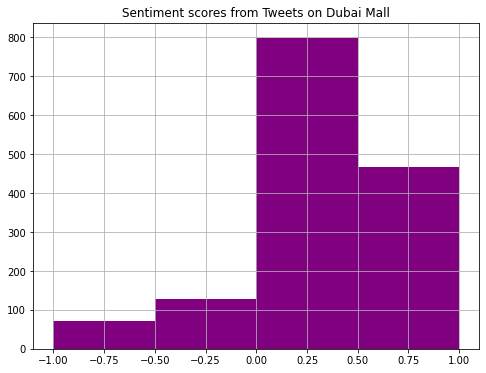

In [222]:
# Sentiment Compound Score Distribution

#mall selection
m=0
fig, ax = plt.subplots(figsize=(8, 6))
# Plot histogram of the polarity values
DFL[m]['compound_vader_sentiscore'].hist(bins=[-1,-0.5,0,0.5,1],
             ax=ax,
             color="purple")

plt.title("Sentiment scores from Tweets on " +str(mallnames[m]))
plt.show()

/home/datascience/conda/classic_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


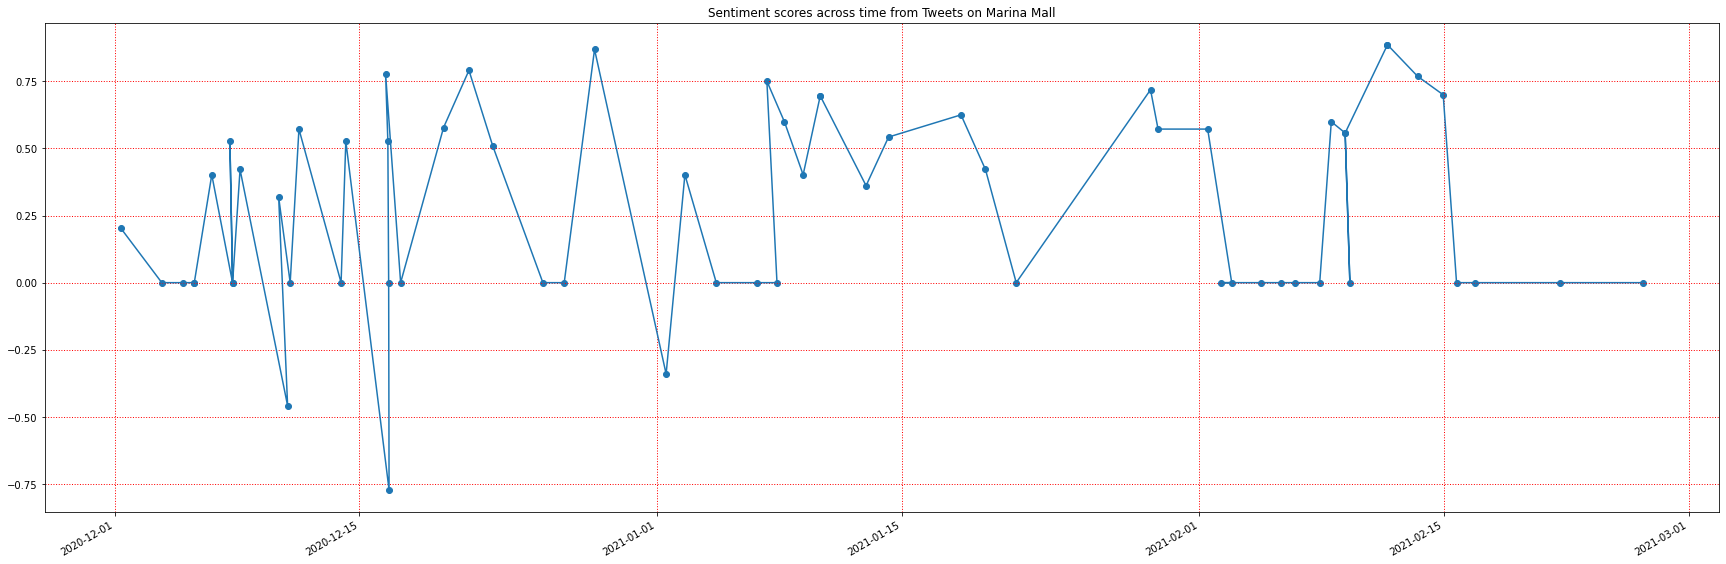

In [224]:
#mall selection
m=1

# Sentiment Score vs Time
from datetime import datetime
x=DFL[m]["Timestamp"] = pd.to_datetime(DFL[m]["Timestamp"])
y=DFL[m]['compound_vader_sentiscore']

plt.subplots(figsize=(30, 10))
plt.plot(x, y)
plt.scatter(x, y)
plt.grid(color='r', linestyle=':', linewidth=1)
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.title("Sentiment scores across time from Tweets on "+ str(mallnames[m]))

plt.show()
plt.close()

Sentiment scores for tweets made on Marina Mall


<AxesSubplot:>

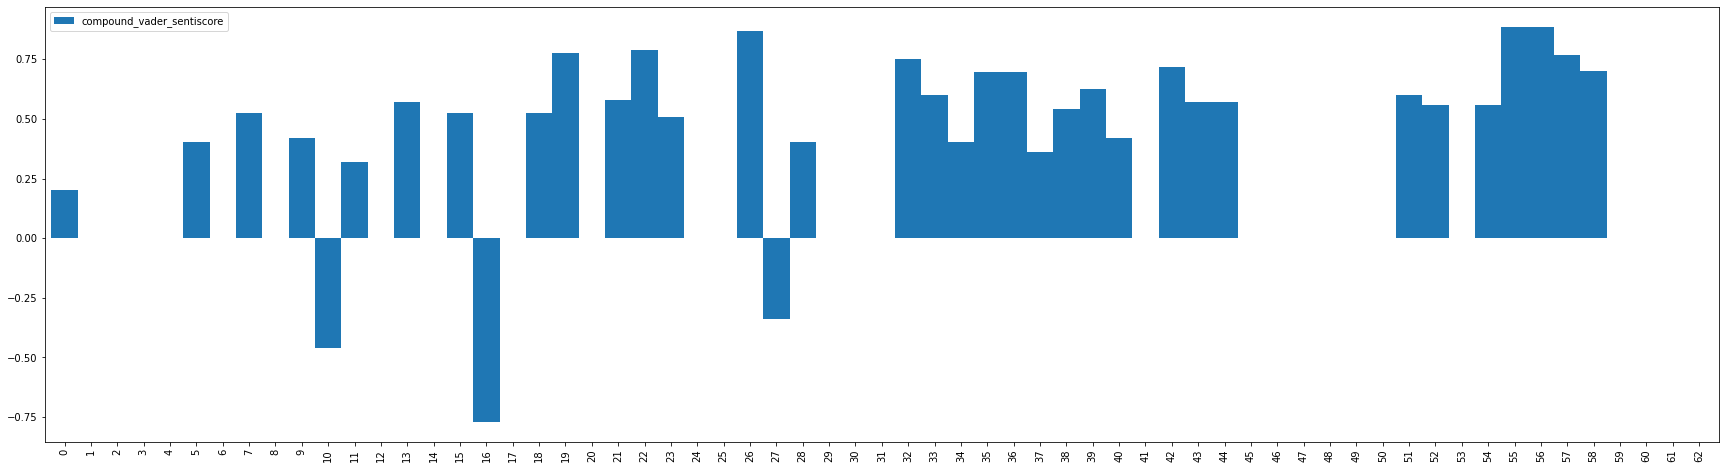

In [227]:
# Sentiment Score vs Sentence
#mall selection
m=1
print("Sentiment scores for tweets made on "+ str(mallnames[m]))
DFL[m][['cleaned_tweet','compound_vader_sentiscore']].plot.bar(figsize=(30,8),width=1)

In [228]:
#visualizing tweets using heatmap
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(30,1)})

def visualise_sentiments(data):
  sns.heatmap(pd.DataFrame(data).set_index("Sentence").T,center=0, annot=True, cmap = "PiYG")

In [229]:
data=DFL[2].cleaned_tweet[0]
data

'my beautiful son luke and i taking a selfie in front of camilla the camel that’s lovindubai ’s official mascot at ibnbattutamall it’s nice to start doing ‘normal’ things in dubai again love family lovindubai ibnbattuta uae staysafe'

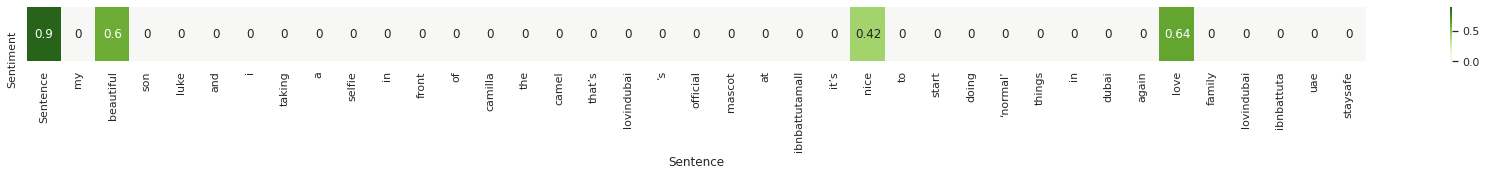

In [230]:
visualise_sentiments({
    "Sentence":["Sentence"] + data.split(),
    "Sentiment":[sid.polarity_scores(data)["compound"]] + [sid.polarity_scores(word)["compound"] for word in (data.split())]
})

#### Textblob
- similar to NLTK - using a bag of words classifier
- advantage: includes Subjectivity Analysis too (how factual/opinionated a piece of text is)

In [231]:
! pip install textblob

In [232]:
from textblob import TextBlob

In [233]:
def tbsenti(x):
    return TextBlob(x).sentiment  
def polsenti(x):
    return TextBlob(x).polarity
def subjsenti(x):
    return TextBlob(x).subjectivity

In [234]:
for k in range(len(DFL)):
    DFL[k]['tb_sentiscore'] = DFL[k]['cleaned_tweet'].apply(tbsenti)
    DFL[k]['tb_polarity'] = DFL[k]['cleaned_tweet'].apply(polsenti)
    DFL[k]['tb_subjectivity'] = DFL[k]['cleaned_tweet'].apply(subjsenti)

/home/datascience/conda/classic_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/datascience/conda/classic_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/datascience/conda/classic_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [241]:
DFL[0][['cleaned_tweet','tb_sentiscore','tb_polarity','tb_subjectivity']].head()

,cleaned_tweet,tb_sentiscore,tb_polarity,tb_subjectivity
0,enjoying coffee in dubai mall,"(0.5, 0.6)",0.5,0.60
1,great time ate the dubai mall,"(0.8, 0.75)",0.8,0.75
2,spirit of the union th national day celebratio...,"(0.0, 0.0)",0.0,0.00
3,ab kaif they are playing y’a f dubai mall,"(0.0, 0.0)",0.0,0.00
4,just posted a photo dubai mall dubaiuae httpsi...,"(0.0, 0.0)",0.0,0.00


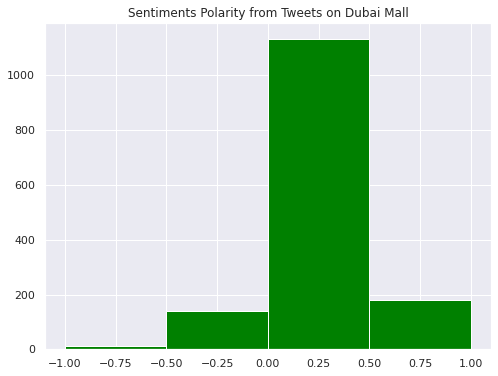

In [239]:
# Sentiment Polarity Score Distribution
#mallselection
m=0
fig, ax = plt.subplots(figsize=(8, 6))
# Plot histogram of the polarity values
DFL[m]['tb_polarity'].hist(bins=[-1, -0.5, 0, 0.5, 1],
             ax=ax,
             color="green")
plt.title("Sentiments Polarity from Tweets on "+ str(mallnames[m]))
plt.show()

<AxesSubplot:>

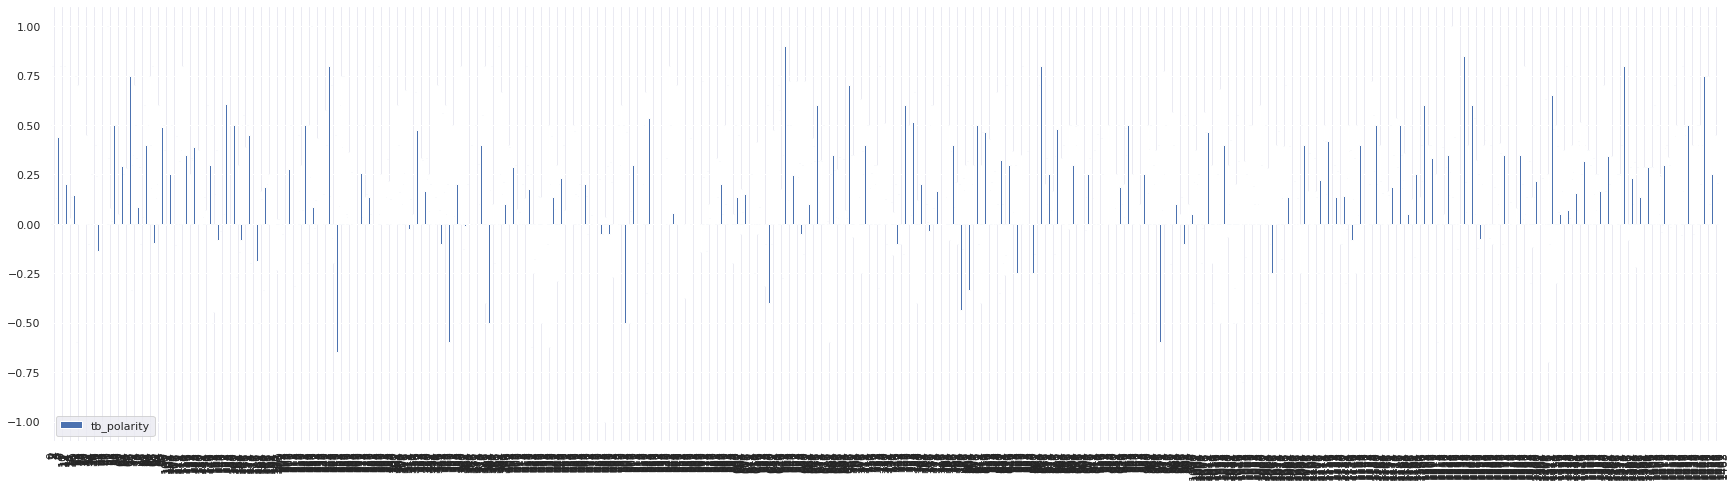

In [240]:
# Sentiment Score vs Sentence
#mallselection
m=0
DFL[m][['cleaned_tweet','tb_polarity']].plot.bar(figsize=(30,8),width=1)

In [249]:
data

'my beautiful son luke and i taking a selfie in front of camilla the camel that’s lovindubai ’s official mascot at ibnbattutamall it’s nice to start doing ‘normal’ things in dubai again love family lovindubai ibnbattuta uae staysafe'

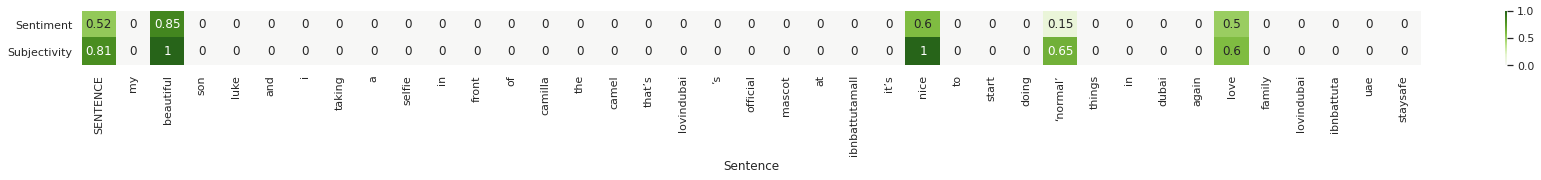

In [250]:
visualise_sentiments({
      "Sentence":["SENTENCE"] + data.split(),
      "Sentiment":[TextBlob(data).polarity] + [TextBlob(word).polarity for word in data.split()],
      "Subjectivity":[TextBlob(data).subjectivity] + [TextBlob(word).subjectivity for word in data.split()],
})

In [259]:
df1.head(2)

,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL,cleaned_tweet,text_language
0,Enoch Mthembu,@EnochMthembu,2020-12-01T17:11:44.000Z,Enjoying coffee in Dubai Mall.,NaN,NaN,1.0,NaN,1,['https://pbs.twimg.com/media/EoKvN7CXYAECo0m?...,https://twitter.com/EnochMthembu/status/133382...,enjoying coffee in dubai mall,en
1,Bernard Sabi Mulenga,@sabi_jnr,2020-12-01T17:49:15.000Z,Great time ate the Dubai mall.,NaN,NaN,NaN,NaN,NaN,['https://pbs.twimg.com/media/EoK3yw3WMAEtan3?...,https://twitter.com/sabi_jnr/status/1333830532...,great time ate the dubai mall,en


In [272]:
#df1.columns= df1.columns. str. replace(' ','_')
df1.columns

Index(['UserScreenName', 'UserName', 'Timestamp', 'Text', 'Embedded_text',
       'Emojis', 'Comments', 'Likes', 'Retweets', 'Image_link', 'Tweet_URL',
       'cleaned_tweet', 'text_language'],
      dtype='object')

#### Flair
- classifier is based on a character-level LSTM neural network
- takes sequences of letters and words into account when predicting

In [235]:
! pip install flair

In [237]:
import flair
# import classifier and make prediction for the selected sentece
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')

2021-04-08 16:26:24,457 loading file /home/datascience/.flair/models/sentiment-en-mix-distillbert_4.pt


In [49]:
s = flair.data.Sentence(sentence)
flair_sentiment.predict(s)
total_sentiment = s.labels
total_sentiment

2021-03-30 06:44:57,168 loading file /home/datascience/.flair/models/sentiment-en-mix-distillbert_4.pt


[POSITIVE (0.8086)]

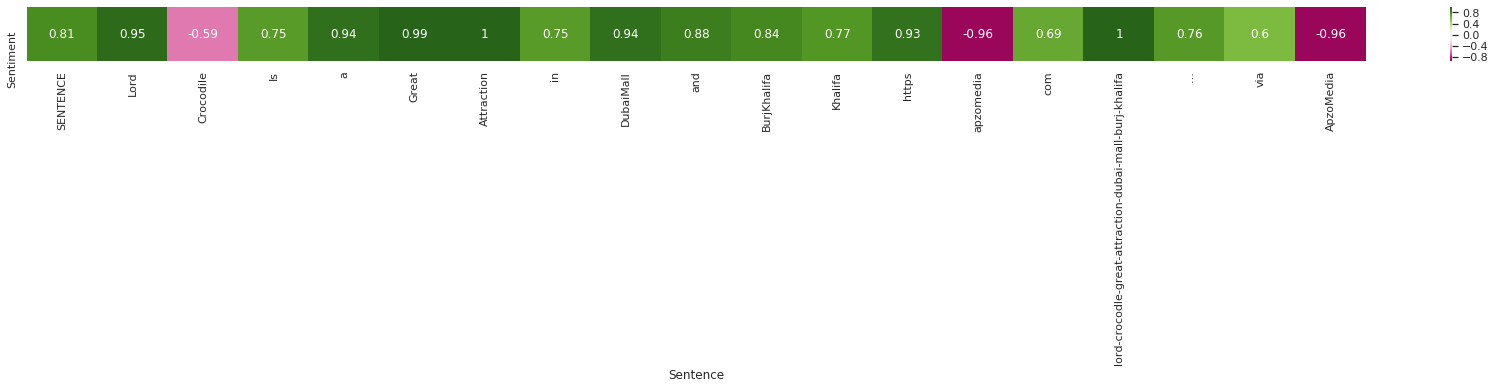

In [50]:
tokens = [token.text for token in s.tokens]
ss = [flair.data.Sentence(s) for s in tokens]
[flair_sentiment.predict(s) for s in ss]
sentiments = [s.labels[0].score * (-1,1)[str(s.labels[0]).split()[0].startswith("POS")] for s in ss]

visualise_sentiments({
      "Sentence":["SENTENCE"] + tokens,
      "Sentiment":[total_sentiment[0].score *(-1,1)[str(total_sentiment[0]).split()[0].startswith("POS")]] + sentiments,
})